<a href="https://colab.research.google.com/github/cantaruttim/Deltalake/blob/main/Deltalake_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

In [32]:
acoes = ['BBD', 'ITUB', 'SAN', 'BOVA11.SA']

acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2019-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [33]:
acoes_df

,BBD,ITUB,SAN,BOVA11.SA
Date,,,,
2019-01-02,8.841667,8.004946,4.51,87.900002
2019-01-03,8.950000,8.112119,4.55,88.000000
2019-01-04,9.066667,8.219291,4.72,88.500000
2019-01-07,9.041667,8.145095,4.78,88.480003
2019-01-08,9.191667,8.293487,4.81,88.830002
...,...,...,...,...
2023-09-01,3.020000,5.580000,3.75,114.050003
2023-09-05,2.920000,5.390000,3.70,113.620003
2023-09-06,2.860000,5.330000,3.61,112.250000


In [34]:
acoes_df.isnull().sum()

BBD           0
ITUB          0
SAN           0
BOVA11.SA    56
dtype: int64

In [35]:
acoes_df = acoes_df.rename(columns={'BBD': 'Banco Bradesco', 'ITUB': 'Itau Unibanco',
                                    'SAN': 'Banco Santander', 'BOVA11.SA': 'BOVA'})

acoes_df.head()

,Banco Bradesco,Itau Unibanco,Banco Santander,BOVA
Date,,,,
2019-01-02,8.841667,8.004946,4.51,87.900002
2019-01-03,8.950000,8.112119,4.55,88.000000
2019-01-04,9.066667,8.219291,4.72,88.500000
2019-01-07,9.041667,8.145095,4.78,88.480003
2019-01-08,9.191667,8.293487,4.81,88.830002


In [36]:
acoes_df.shape

(1180, 4)

In [37]:
# retirmaos os valores NA
acoes_df.dropna(inplace=True)

In [38]:
acoes_df.shape

(1124, 4)

In [39]:
acoes_df.isnull().sum()

Banco Bradesco     0
Itau Unibanco      0
Banco Santander    0
BOVA               0
dtype: int64

In [40]:
acoes_df.to_csv('acoes.csv')

# Construindo o deltalake


---



In [42]:
# !pip install deltalake # install the python library for delta
# !mkdir /lake # create a directory call lake
# !git clone https://github.com/cantaruttim/Deltalake # take the data from github
!cp -r /content/Deltalake/data /lake # copy csv files into the lake folder (posteriormente deixo em content)

In [12]:
# Installing Apache Spark into Google Colab
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip -q install findspark

In [13]:
import pandas as pd
from deltalake import DeltaTable
from deltalake.writer import write_deltalake
import deltalake

In [43]:
df = pd.read_csv("/lake/data/acoes.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2079 non-null   object 
 1   Banco Bradesco   2079 non-null   float64
 2   Itau Unibanco    2079 non-null   float64
 3   Banco Santander  2079 non-null   float64
 4   BOVA             2079 non-null   float64
dtypes: float64(4), object(1)
memory usage: 81.3+ KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Banco Bradesco,2079.0,5.866311,2.220954,2.380000,3.842975,5.490000,7.875000,10.900000
Itau Unibanco,2079.0,5.545068,1.414663,2.743011,4.385820,5.420000,6.713383,9.332234
Banco Santander,2079.0,4.505608,1.489374,1.790000,3.450000,4.220000,5.525000,8.420000
BOVA,2079.0,83.873078,24.178034,36.450001,61.610001,90.349998,105.099998,125.750000


## Writing a pandas DataFrame in Delta:

In [47]:
write_deltalake('/lake/delta_table', df,
                description='Financial analysis of delta_table with Pandas')

In [49]:
dataframe = DeltaTable('/lake/delta_table').to_pandas()
dataframe

,Date,Banco Bradesco,Itau Unibanco,Banco Santander,BOVA
0,2015-01-02,8.829201,6.280447,8.42,47.259998
1,2015-01-05,8.712121,6.205501,7.93,46.320000
2,2015-01-06,9.139118,6.405356,7.78,46.580002
3,2015-01-07,9.380165,6.585226,7.90,48.150002
4,2015-01-08,9.476584,6.735117,7.35,48.509998
...,...,...,...,...,...
2074,2023-08-30,3.090000,5.640000,3.91,113.900002
2075,2023-08-31,2.990000,5.500000,3.87,112.309998
2076,2023-09-01,3.020000,5.580000,3.75,114.050003
2077,2023-09-05,2.920000,5.390000,3.70,113.620003


<Axes: title={'center': 'Histórico do preço das ações'}>

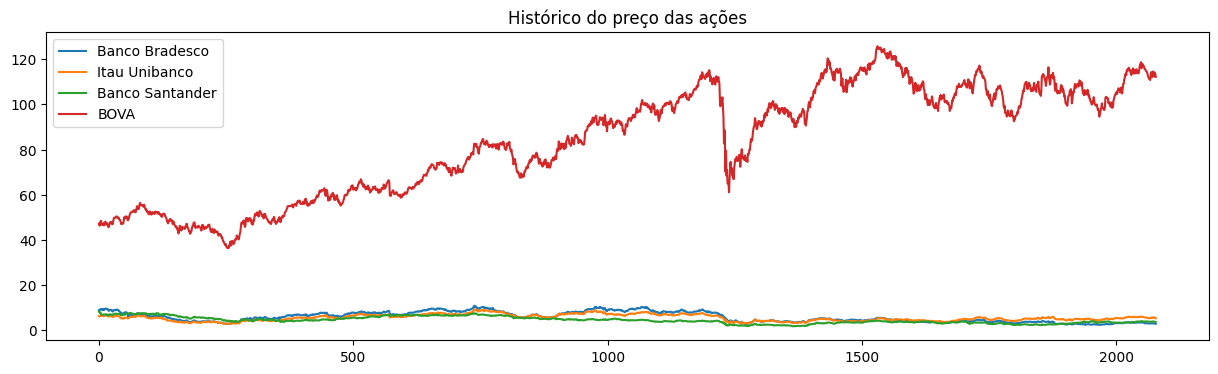

In [65]:
dataframe.plot(figsize = (15,4), title = 'Histórico do preço das ações');

### Normalização dos dados

In [51]:
acoes_df_normalizado = dataframe.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [52]:
acoes_df_normalizado

,Date,Banco Bradesco,Itau Unibanco,Banco Santander,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.986739,0.988067,0.941805,0.980110
2,2015-01-06,1.035101,1.019889,0.923991,0.985612
3,2015-01-07,1.062403,1.048528,0.938242,1.018832
4,2015-01-08,1.073323,1.072395,0.872922,1.026449
...,...,...,...,...,...
2074,2023-08-30,0.349975,0.898025,0.464371,2.410072
2075,2023-08-31,0.338649,0.875734,0.459620,2.376428
2076,2023-09-01,0.342047,0.888472,0.445368,2.413246
2077,2023-09-05,0.330721,0.858219,0.439430,2.404147


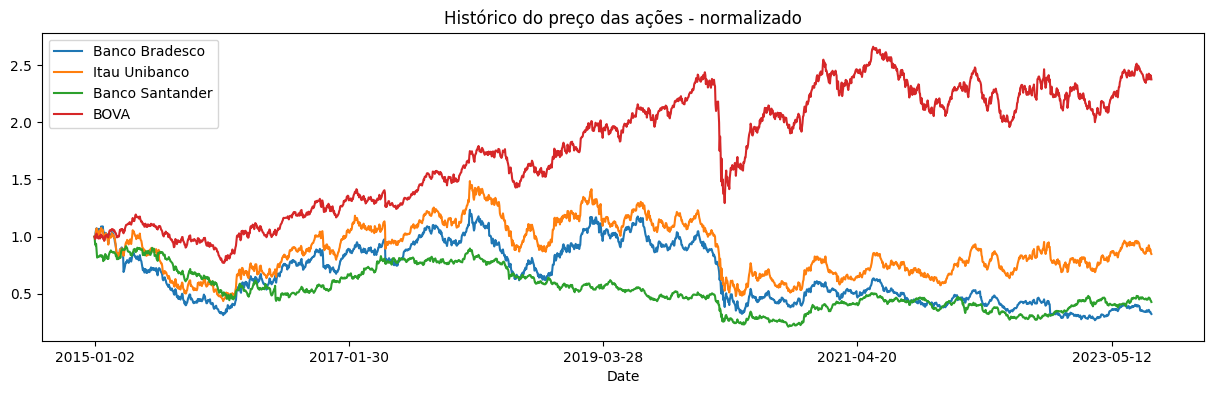

In [61]:
acoes_df_normalizado.plot(x = 'Date',
                          figsize = (15,4), title = 'Histórico do preço das ações - normalizado');

In [64]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
  figura.update_layout(hovermode="x")
figura.show()

# _Analisando dados com **Apache Spark**_

In [66]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [67]:
import findspark
findspark.init()

In [68]:
### import Spark libraries
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

### spark package maven coordinates - in case you are loading more than just delta
spark_packages_list = [
    'io.delta:delta-core_2.12:2.2.0',
]
spark_packages = ",".join(spark_packages_list)

### SparkSession
spark = (
    SparkSession.builder
    .config("spark.jars.packages", spark_packages)
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")
    .getOrCreate()
)

In [69]:
df_spark = spark.read.format("delta").load("/lake/delta_table") # carregamento

In [70]:
df_spark.show() # action

+----------+-----------------+-----------------+-----------------+------------------+
|      Date|   Banco Bradesco|    Itau Unibanco|  Banco Santander|              BOVA|
+----------+-----------------+-----------------+-----------------+------------------+
|2015-01-02|8.829200744628906|6.280447006225586|8.420000076293945|  47.2599983215332|
|2015-01-05| 8.71212100982666|6.205501079559326|7.929999828338623| 46.31999969482422|
|2015-01-06|9.139118194580078|6.405355930328369| 7.78000020980835| 46.58000183105469|
|2015-01-07|9.380165100097656|6.585226058959961|7.900000095367432|48.150001525878906|
|2015-01-08|9.476584434509276|6.735116958618164|7.349999904632568|  48.5099983215332|
|2015-01-09|9.290634155273438|6.570237159729004|6.880000114440918| 47.52999877929688|
|2015-01-12|9.028925895690918|6.355391979217529|6.909999847412109| 46.83000183105469|
|2015-01-13|9.132230758666992|6.430337905883789|6.980000019073486| 46.63999938964844|
|2015-01-14|9.428375244140623|6.555246829986572|6.9600